In [2]:
%pprint

Pretty printing has been turned OFF


In [1]:
import numpy as np
import csv
import datetime as dt
import matplotlib.pyplot as plt
import collections as co
from operator import itemgetter
import os
import datetime as dt
from scipy.spatial import ConvexHull

In [2]:
ls

README.md          incidents (1).csv  nancrime.ipynb


In [3]:
# collect crime records into dat from csv
dat = []
with open('incidents (1).csv', newline='') as csvfile:
    spamreader1 = csv.reader(csvfile, delimiter=',', quotechar='|')
    for i,row in enumerate(spamreader1):
        
        if i==0:
            ids = row
            
        else:  
            di = dict()
            for j,ID in enumerate(ids):
                
                if ID=='reportedtime':
                    Date = row[j].split(' ')
                    di['date'] = Date
                    continue
                di[ID] = row[j]
            dat.append(di)

In [4]:
# sample crime record
dat[0]

{'id': '4201201937861',
 'file': '2019-37861',
 'date': ['9/20/2019', '3:50:00', 'AM'],
 'occurrencetype': 'Commercial Break and Enter',
 'occurrencetypeid': '2120-01',
 'crimetype': 'Break and Enter',
 'crimetypeid': '1',
 'crimecategory': 'Property Crime',
 'crimecategoryid': '1',
 'location': '23XX DORMAN RD',
 'locationid': '39074',
 'neighbourhood': 'Northfield',
 'neighbourhoodid': '5',
 'lat': '49.196446',
 'long': '-123.985369'}

In [5]:
# 4422 crime records
len(dat)

4422

In [6]:
LAT = [float(crime['lat']) for crime in dat]
LONG = [float(crime['long']) for crime in dat] 
avg_lat = sum(LAT)/len(LAT)
avg_long = sum(LONG)/len(LONG)

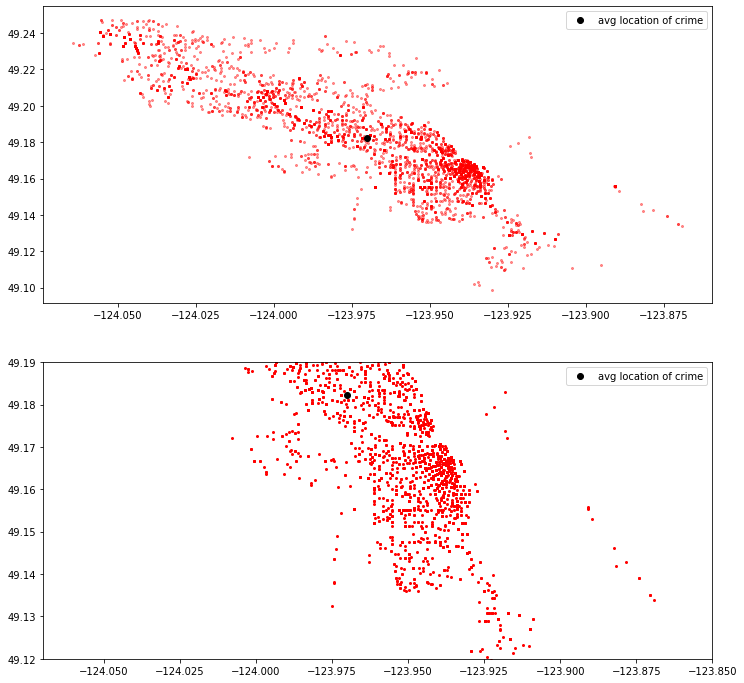

In [7]:
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.plot(LONG,LAT,'ro',markersize=2,alpha=0.4)
plt.plot(avg_long,avg_lat,'o',color='black',label='avg location of crime')
plt.legend()
# plt.ylim(49.12,49.19)
# plt.xlim(-123,975,-123,925)
plt.subplot(212)
plt.plot(LONG,LAT,'ro',markersize=2)
plt.plot(avg_long,avg_lat,'o',color='black',label='avg location of crime')
plt.ylim(49.12,49.19)
plt.xlim(-124.07,-123.85)
plt.legend()


In [8]:
neighbourhoods = set()
for crime in dat:
    neighbourhoods.add(crime['neighbourhood'])

In [9]:
LAT = [(float(crime['lat']), crime['neighbourhood']) for crime in dat]
LONG = [(float(crime['long']), crime['neighbourhood']) for crime in dat] 

Rutherford
Harewood
Newcastle/brechin
Westwood
Northfield
Townsite
North Slope
University District
Downtown
Departure Bay
Chase River
Duke Pt
Pleasant Valley
Dover
Hammond Bay
Linley Valley
South End
Diver Lake


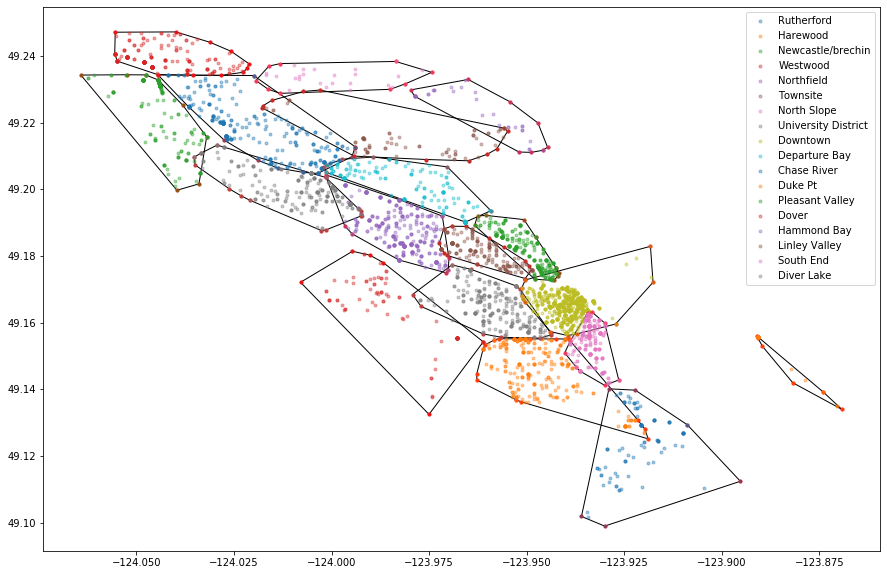

In [39]:
plt.close()
plt.figure(figsize=(15,10))
nDat = dict()
ctDat = dict()
ctdict = co.defaultdict(int)
for n in neighbourhoods:
    if n == "Unknown": continue
        
    print(n)
    LAT_n = [float(crime['lat']) for crime in dat if crime['neighbourhood']==n]
    LONG_n = [float(crime['long']) for crime in dat if crime['neighbourhood']==n]
    nDat[n] = []
    for crime in dat:
        if crime['neighbourhood']==n:
            nDat[n].append(crime)
            ctdict[n]+=1
    ctDat[n] = ctdict      
    PTS = np.asarray([(x,y) for x,y in zip(LONG_n,LAT_n)])
    hull = ConvexHull(PTS)
    plt.fill(PTS[hull.vertices,0], PTS[hull.vertices,1],fill=False)
    for i in range(len(hull.vertices)):
        plt.plot(PTS[hull.vertices[i]][0],PTS[hull.vertices[i]][1], 'r.')
    plt.plot(LONG_n,LAT_n,'o',markersize=3,alpha=0.4,label=n)
    ctdictS = sorted(list(ctdict.items()),key=itemgetter(1))

plt.legend()

In [11]:
ctDatS = sorted(list(ctdict.items()),key=itemgetter(1))[-1:0:-1]

In [12]:
# Locations with number of crimes
ctDatS

[('Downtown', 1050),
 ('Northfield', 392),
 ('Rutherford', 319),
 ('Harewood', 309),
 ('Diver Lake', 299),
 ('Newcastle/brechin', 298),
 ('South End', 286),
 ('University District', 283),
 ('Dover', 247),
 ('Pleasant Valley', 196),
 ('Townsite', 196),
 ('Departure Bay', 174),
 ('Chase River', 101),
 ('Westwood', 87),
 ('Linley Valley', 83),
 ('Hammond Bay', 39),
 ('North Slope', 33),
 ('Duke Pt', 29)]

In [28]:
crime_counter = co.defaultdict(int)
for crime in dat:
    crime_counter[crime['crimetype']] += 1
CL = crime_counter.items()
CLS = sorted(list(CL),key=itemgetter(1))

In [29]:
print("Top crimes",end='\n \n')
for crim,num in CLS[::-1]:
    print(crim+':',num)

Top crimes
 
Mischief: 1391
Theft from Motor Vehicle: 1277
Theft: 730
Shoplifting: 471
Break and Enter: 401
Theft of Motor Vehicle: 152


In [30]:
occurence_counter = co.defaultdict(int)
for crime in dat:
    occurence_counter[crime['occurrencetype']] += 1
OL = occurence_counter.items()
OLS = sorted(list(OL),key=itemgetter(1))
print("Top crimes",end='\n \n')
for crim,num in OLS[::-1]:
    print(crim+':',num)

Top crimes
 
Theft from Motor Vehicle Under $5000: 1265
Mischief Under $5000: 905
Theft Other Under $5000: 568
Mischief - Loss of Enjoyment of Property: 471
Shoplifting Under $5000: 470
Commercial Break and Enter: 185
Residential Break and Enter: 141
Theft Bicycle Under $5000: 133
Other Break and Enter: 73
Theft of Auto Under $5000: 44
Theft of Truck Under $5000: 22
Theft of Auto Over $5000: 22
Theft of Motorcycle Under $5000: 18
Take Auto Without Consent Under $5000: 13
Theft of Truck Over $5000: 12
Theft From Motor Vehicle Over $5000: 12
Theft From Mail: 12
Theft Other Over $5000: 10
Mischief Over $5000: 8
Mischief Caused by Act/Ommission: 7
Theft of Other Vehicle Under $5000: 7
Take Auto Without Consent Over $5000: 6
Theft Bicycle Over $5000: 6
Theft of Other Vehicle Over $5000: 4
Theft of Motorcycle Over $5000: 4
Seasonal Residence Break and Enter: 2
Theft Electric/Gas/Telephone Under $5000: 1
Shoplifting Over $5000: 1


In [31]:
for loc in nDat.keys():
    occurence_counter = co.defaultdict(int)
    for crime in nDat[loc]:
        occurence_counter[crime['occurrencetype']] += 1
    OL = occurence_counter.items()
    OLS = sorted(list(OL),key=itemgetter(1))
    print("Top crimes in "+loc,end='\n \n')
    for crim,num in OLS[:-4:-1]:
        print(crim+':',num)
    print('-'*20,end='\n \n')

Top crimes in Hammond Bay
 
Mischief Under $5000: 15
Theft from Motor Vehicle Under $5000: 10
Theft Other Under $5000: 7
--------------------
 
Top crimes in Harewood
 
Theft from Motor Vehicle Under $5000: 84
Mischief Under $5000: 58
Theft Other Under $5000: 45
--------------------
 
Top crimes in Diver Lake
 
Theft from Motor Vehicle Under $5000: 83
Mischief Under $5000: 61
Theft Other Under $5000: 42
--------------------
 
Top crimes in Westwood
 
Theft from Motor Vehicle Under $5000: 33
Mischief Under $5000: 15
Theft Other Under $5000: 15
--------------------
 
Top crimes in Pleasant Valley
 
Shoplifting Under $5000: 58
Theft from Motor Vehicle Under $5000: 47
Theft Other Under $5000: 27
--------------------
 
Top crimes in North Slope
 
Theft from Motor Vehicle Under $5000: 13
Mischief Under $5000: 9
Residential Break and Enter: 4
--------------------
 
Top crimes in South End
 
Mischief Under $5000: 76
Theft from Motor Vehicle Under $5000: 65
Theft Other Under $5000: 52
---------

In [32]:
def get_crime_type(crime):
    return crime['crimetype']+': '+crime['occurrencetype']

In [33]:
types = set()
for dat_i in dat:
    types.add(dat_i['crimetype']+': '+dat_i['occurrencetype'])

In [34]:
weekdays = ['Mon', 'Tue', 'Wed', "Th",'Fri','Sat',"Sun"]

In [35]:
type_day_dat = dict()
for typ in types:
    ctdi = co.defaultdict(int)
    for crime in dat:
        if get_crime_type(crime) == typ :
            d = crime['date'][0].split('/')
            crime_dt = dt.datetime(int(d[-1]),int(d[0]),int(d[1]))
            ctdi[weekdays[crime_dt.weekday()]] += 1
    ctdiS = sorted(list(ctdi.items()),key=itemgetter(1))[-1:-16:-1]
    if ctdiS[-1][1]>=6:
        type_day_dat[typ] = ctdiS      

In [129]:
## random point uniform 
n = len(PTS)
## color scheme
carr = np.ndarray( shape=(n,3), dtype=np.float )

for i,j in it.product( range(n), range(3) ):
    carr[i,j] = rd.random()
## get rid of dim colors as before
for i in range(n):
    delt = 1.0-max(carr[i])
    carr[i] = delt+carr[i] ## numpy increments all three elements

In [158]:
PTS = []
for i,(n,di) in enumerate(nDat.items()):
    print(i,n)
    avg_long = sum([float(crime['long']) for crime in di])/len(di)
    avg_lat = sum([float(crime['lat']) for crime in di])/len(di)
    PTS.append((avg_lat,avg_long))
PTS = np.array(PTS)

0 Hammond Bay
1 Harewood
2 Diver Lake
3 Westwood
4 Pleasant Valley
5 North Slope
6 South End
7 University District
8 Duke Pt
9 Unknown
10 Townsite
11 Dover
12 Departure Bay
13 Rutherford
14 Linley Valley
15 Newcastle/brechin
16 Northfield
17 Chase River
18 Downtown


In [159]:
PTS

array([[  49.22292413, -123.9619939 ],
       [  49.14653372, -123.94649877],
       [  49.20111371, -124.00824721],
       [  49.16398638, -123.98329894],
       [  49.22455996, -124.04371215],
       [  49.23366161, -124.00034812],
       [  49.15502152, -123.93367541],
       [  49.16510576, -123.95826904],
       [  49.15103879, -123.88645631],
       [  49.153443  , -123.930326  ],
       [  49.18131922, -123.96194281],
       [  49.23871836, -124.04428971],
       [  49.20040974, -123.98099832],
       [  49.21700648, -124.01844776],
       [  49.21547086, -123.98185445],
       [  49.18132661, -123.95016561],
       [  49.18786749, -123.98302548],
       [  49.12451485, -123.92114908],
       [  49.16502008, -123.93871629]])

In [166]:
 ## modify above code to try and find the vertices
def voronoi_near(Pts, carr, res, norm=norm):
    
    NDom = np.ndarray(shape=(res,res), dtype=np.uintp)
    
    for i,j in it.product( range(res), range(res) ):
        xy = np.array([i/res, j/res])
        DL = [(k, norm(xy-Pts[k])) for k in range(len(Pts))]
        DLS = sorted(DL, key=op.itemgetter(1))
        NDom[i,j] = DLS[0][0]
    
    VDom = np.ndarray(shape=(res,res,3), dtype=np.float)
    for i,j in it.product( range(res), range(res) ):
        print(NDom(i,j))
        VDom[j,i] = carr[NDom[i,j]]
                         
    plt.imshow(VDom,extent=[min(Pts.T[0]),max(Pts.T[0]),min(Pts.T[1]),max(Pts.T[1])], origin='lower' )
    
    for k,pt in enumerate(Pts):
        plt.plot( pt[0], pt[1], 'o',color=carr[k])

TypeError: 'numpy.ndarray' object is not callable

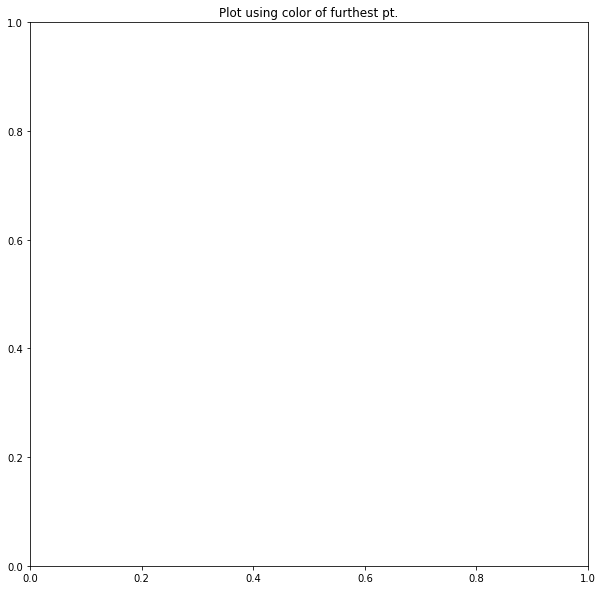

In [167]:
plt.figure(figsize=(10,10))
plt.title("Plot using color of furthest pt.")
voronoi_near(PTS, carr, 100)